## Questão 5 - Bitcoin 

### Bruno Makoto Tanabe de Lima - Processo Seletivo Quant 


# Overview

1. Importing Libraries
2. Data Preparation
3. Modelling
4. Results

# 1. Importing Libraries

In [16]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go

# Modelling
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 2. Data Preparation

In [2]:
df = pd.read_csv('raw.githubusercontent.com_coinmetrics_data_master_csv_btc.csv', low_memory=False)

df.tail()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
5293,2023-07-02,997177.0,9021.0,2982721.0,19544516.0,966.0,551404.0,9165030.0,40.0,101232.0,...,2.640891e+09,0.358964,10982.235937,0.001527,46.706967,18.419474,0.025532,0.024559,30587.21,coinbase-btc-usd-spot
5294,2023-07-03,977874.0,9029.0,2982286.0,19547725.0,970.0,551375.0,9166909.0,41.0,101233.0,...,4.923495e+09,0.459848,14317.544101,0.001996,62.133875,18.323609,0.025548,0.024602,30613.51,coinbase-btc-usd-spot
5295,2023-07-04,963366.0,9028.0,2982902.0,19514371.0,968.0,551403.0,9163543.0,41.0,101188.0,...,3.604123e+09,0.357845,11021.618716,0.001480,45.583922,18.199372,0.025568,0.024763,31161.80,coinbase-btc-usd-spot
5296,2023-07-05,964759.0,9019.0,2983845.0,19520505.0,969.0,551460.0,9167328.0,41.0,101209.0,...,3.549644e+09,0.307924,9391.021695,0.000772,23.538372,18.084015,0.025584,0.022576,30771.25,coinbase-btc-usd-spot
5297,2023-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30499.27,coinbase-btc-usd-spot


### Let's first drop the NaN values from the dataframe

In [3]:
df = df.drop(df.index[-1]) # Dropping NaN values from last row

In [4]:
df.shape

(5297, 147)

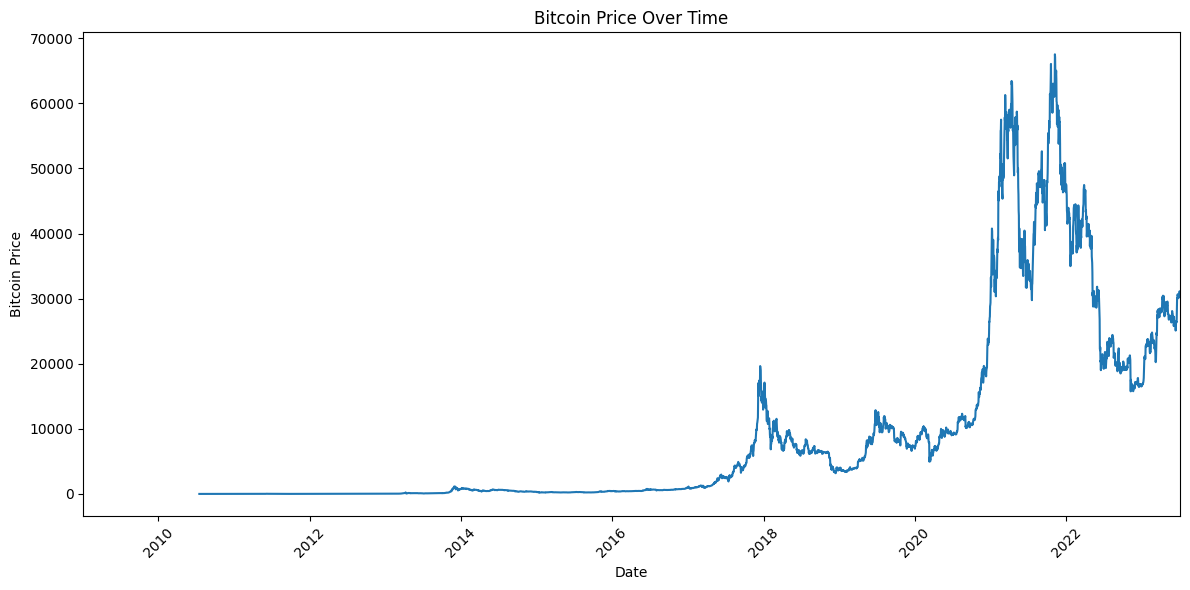

In [5]:
# Plotting PriceUSD vs date

df['time'] = pd.to_datetime(df['time'])  # Convert 'time' column to datetime if needed

plt.figure(figsize=(12, 6))  

plt.plot(df['time'], df['PriceUSD'])  

plt.xlabel('Date')  
plt.ylabel('Bitcoin Price') 
plt.title('Bitcoin Price Over Time') 

plt.xticks(rotation=45)  
plt.xlim(df['time'].min(), df['time'].max())
plt.tight_layout() 

plt.show()  

In [6]:
# Let's find all columns with NaN values

null_proportions = df.isnull().mean()
columns_with_nan = df.columns[df.isna().any()].tolist()

# Display the proportions of null values for each column
print(null_proportions)

time                          0.000000
AdrActCnt                     0.000000
AdrBal1in100KCnt              0.000000
AdrBal1in100MCnt              0.000000
AdrBal1in10BCnt               0.000000
                                ...   
VelCur1yr                     0.001133
VtyDayRet180d                 0.139891
VtyDayRet30d                  0.111573
principal_market_price_usd    0.907117
principal_market_usd          0.907117
Length: 147, dtype: float64


In [7]:
# Now let's find the first date at which there's a NaN value

for col in columns_with_nan:
    first_valid_date = df['time'][df[col].notna()].min() 
    print(f"{col}: {first_valid_date}")

AdrBalUSD100Cnt: 2010-07-18 00:00:00
AdrBalUSD100KCnt: 2010-07-18 00:00:00
AdrBalUSD10Cnt: 2010-07-18 00:00:00
AdrBalUSD10KCnt: 2010-07-18 00:00:00
AdrBalUSD10MCnt: 2010-07-18 00:00:00
AdrBalUSD1Cnt: 2010-07-18 00:00:00
AdrBalUSD1KCnt: 2010-07-18 00:00:00
AdrBalUSD1MCnt: 2010-07-18 00:00:00
BlkSizeMeanByte: 2009-01-09 00:00:00
BlkWghtMean: 2009-01-09 00:00:00
CapAct1yrUSD: 2010-07-18 00:00:00
CapMVRVCur: 2010-07-18 00:00:00
CapMVRVFF: 2010-07-18 00:00:00
CapMrktCurUSD: 2010-07-18 00:00:00
CapMrktEstUSD: 2019-06-22 00:00:00
CapMrktFFUSD: 2010-07-18 00:00:00
DiffLast: 2009-01-09 00:00:00
DiffMean: 2009-01-09 00:00:00
FeeByteMeanNtv: 2009-01-09 00:00:00
FeeMeanNtv: 2009-01-11 00:00:00
FeeMeanUSD: 2010-07-18 00:00:00
FeeMedNtv: 2009-01-11 00:00:00
FeeMedUSD: 2010-07-18 00:00:00
FeeTotUSD: 2010-07-18 00:00:00
FlowInExUSD: 2010-07-18 00:00:00
FlowOutExUSD: 2010-07-18 00:00:00
HashRate: 2009-01-09 00:00:00
HashRate30d: 2009-02-07 00:00:00
IssContNtv: 2009-01-09 00:00:00
IssContPctAnn: 2009-01

Since we're interested in PriceUSD, we should already filter dates after 2010-07-18. However, as we can see from the graph of Bitcoin, there isn't a lot of change before 2012. Thus, let's only look at dates after 2011-08-29 so we can have only 4 variables with NaN values

In [8]:

filtered_df = df.loc[df['time'] >= pd.to_datetime("2011-08-29")].copy()


In [9]:
# Let's find the remaining columns with NaN values

null_proportions = filtered_df.isnull().mean()

# Display the proportions of null values for each column
print(null_proportions)

time                          0.000000
AdrActCnt                     0.000000
AdrBal1in100KCnt              0.000000
AdrBal1in100MCnt              0.000000
AdrBal1in10BCnt               0.000000
                                ...   
VelCur1yr                     0.000000
VtyDayRet180d                 0.000000
VtyDayRet30d                  0.000000
principal_market_price_usd    0.886348
principal_market_usd          0.886348
Length: 147, dtype: float64


These 4 remaining columns have way too many NaN values, and since we'll be using only PriceUSD for our further analysis, we shall drop them

In [10]:
clean_df = filtered_df.drop(["CapMrktEstUSD", "ReferenceRateETH", "principal_market_price_usd", "principal_market_usd"], axis=1)

Finally, let's drop the columns with only constant values

In [11]:
constant_columns = clean_df.columns[clean_df.nunique() == 1].tolist()
print(constant_columns)

['AdrBalNtv1MCnt', 'PriceBTC', 'SplyAdrBalNtv1M']


In [12]:
clean_df = clean_df.drop(constant_columns, axis=1)
print(clean_df.shape)

(4329, 140)


In [13]:
clean_df.head(5)

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
968,2011-08-29,18823.0,5195.0,138622.0,236525.0,765.0,109272.0,214327.0,102.0,69522.0,...,19114.0,98087.538890,878977.862275,13.091296,117.313166,0.399,3.575502,25.131633,0.101235,0.116020
969,2011-08-30,17324.0,5220.0,139051.0,237089.0,763.0,109615.0,214885.0,102.0,69694.0,...,17252.0,77710.069483,684621.728585,13.263508,116.850824,0.740,6.519362,25.136099,0.101254,0.116021
970,2011-08-31,17149.0,5241.0,139401.0,237661.0,767.0,109788.0,215398.0,102.0,69856.0,...,16672.0,105610.748522,865918.555093,15.833879,129.824377,1.000,8.199152,25.140113,0.101370,0.116484
971,2011-09-01,16589.0,5274.0,139268.0,237768.0,767.0,109556.0,215452.0,102.0,69834.0,...,15764.0,116802.388272,961783.764190,20.406292,168.031154,1.000,8.234282,25.158316,0.101371,0.116171
972,2011-09-02,16363.0,5258.0,139605.0,238288.0,766.0,109752.0,215943.0,102.0,69957.0,...,15761.0,94057.044590,810905.702773,16.255753,140.147747,1.000,8.621424,25.161901,0.101362,0.105599


# 3. Modelling

Because of the high volatility of bitcoin, let's use an exponential moving average to have a greater emphasis on more recent values

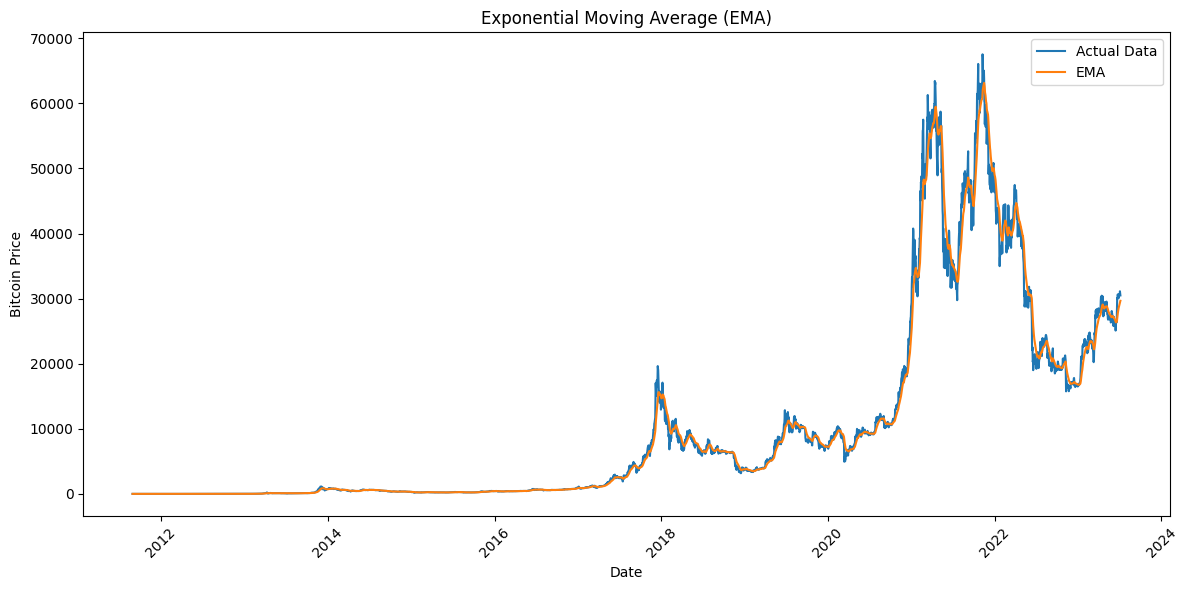

In [14]:
window_size = 20  # Arbitrary window_size - we'll change this later
ema = clean_df['PriceUSD'].ewm(span=window_size, adjust=False).mean()

# Plot the EMA
plt.figure(figsize=(12, 6))
plt.plot(clean_df['time'], clean_df['PriceUSD'], label='Actual Data')
plt.plot(clean_df['time'], ema, label='EMA')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Exponential Moving Average (EMA)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Let's find the RMSE, MAE, and Percentage Error of this model

df_rmse = clean_df.copy()

# Convert the 'time' column to a numeric representation (number of days)
df_rmse['time'] = (df_rmse['time'] - df_rmse['time'].min()).dt.days

# Define the number of splits for cross-validation
n_splits = 5 

# Initialize the Rolling Window Cross-Validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Create empty lists to store the actual and predicted values for each fold
actual_values = []
predicted_values = []

# Perform Rolling Window Cross-Validation
for train_index, test_index in tscv.split(df_rmse):
    train_data = df_rmse.iloc[train_index]
    test_data = df_rmse.iloc[test_index]
    
    # Perform model training
    model = LinearRegression()
    model.fit(train_data[['time']], train_data['PriceUSD'])
    
    # Make predictions
    predictions = model.predict(test_data[['time']])
    
    # Store the actual and predicted values
    actual_values.extend(test_data['PriceUSD'])
    predicted_values.extend(predictions)

# Calculate RMSE
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
print('RMSE:', rmse)

# Convert lists to NumPy arrays
actual_values = np.array(actual_values)
predicted_values = np.array(predicted_values)

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)
print('MAE:', mae)

# Calculate percentage error
percentage_error = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
print('Percentage Error:', percentage_error)



RMSE: 12827.421268332662
MAE: 6568.964787096673
Percentage Error: 50.16211167506683


As expected, the linear regression isn't that great at predicting the price of Bitcoin because of the high volatility, so let's keep using our moving average model

### MACD

The Moving Average Convergence Divergence (MACD) is a technical indicator used in financial analysis to identify potential trend reversals. We can use the crossover of the MACD line and the signal line, as well as the changes in the MACD histogram, to generate trading signals. When the MACD line crosses above the signal line, it may suggest a potential buying opportunity. Conversely, when the MACD line crosses below the signal line, it may indicate a bearish signal, suggesting a potential selling opportunity.

In [18]:
test_df = clean_df.copy()

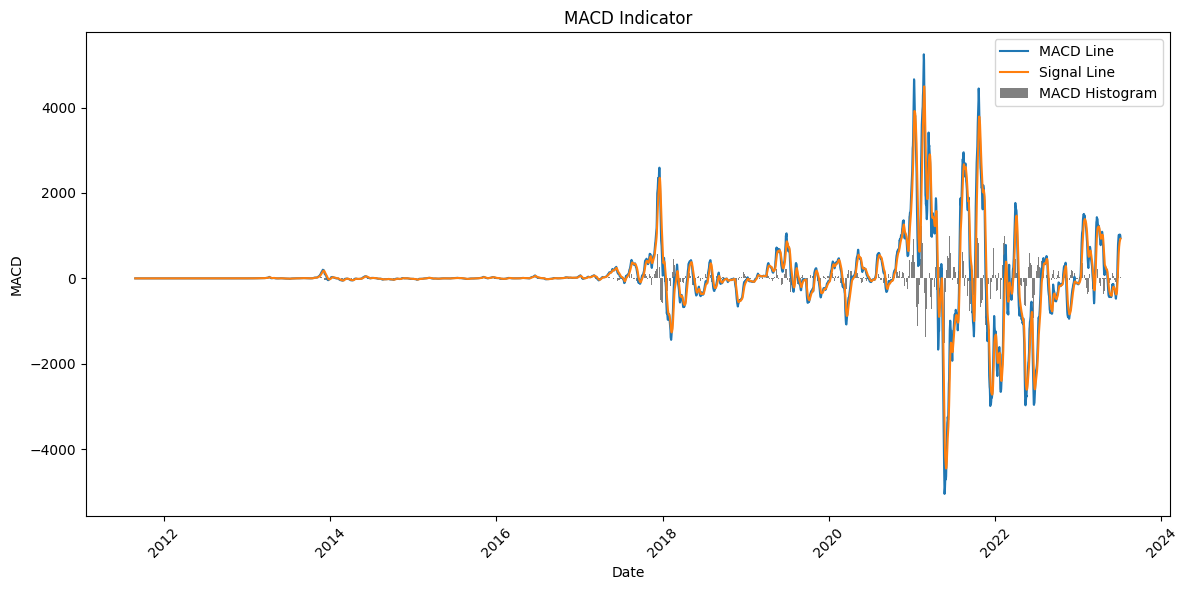

Total Trades: 4307
Winning Trades: 3052
Losing Trades: 988
Win Rate (%): 70.86138843742744
Average Profit: 789.0334325129287
Total Revenue: 3398366.993833184


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the 12-day EMA (arbitrary - we'll look into this later)
ema_12 = test_df['PriceUSD'].ewm(span=12, adjust=False).mean()

# Calculate the 26-day EMA (arbitrary - we'll look into this later)
ema_26 = test_df['PriceUSD'].ewm(span=26, adjust=False).mean()

# Calculate the MACD line
macd_line = ema_12 - ema_26

# Calculate the signal line (9-day EMA of the MACD line)
signal_line = macd_line.ewm(span=9, adjust=False).mean()

# Calculate the MACD histogram
macd_histogram = macd_line - signal_line

# Define the buy/sell signal thresholds
buy_threshold = 0  # MACD line crossing above the signal line
sell_threshold = 0  # MACD line crossing below the signal line

# Initialize variables for tracking positions and P/L
position = None
positions = []
pl = []

# Backtesting loop
for i in range(1, len(test_df)):
    # Check for buy signal
    if macd_line.iloc[i] > signal_line.iloc[i] and macd_line.iloc[i - 1] < signal_line.iloc[i - 1] and (position is None or position == 'SELL'):
        position = 'BUY'
        positions.append((test_df['time'].iloc[i], test_df['PriceUSD'].iloc[i]))
    
    # Check for sell signal
    if macd_line.iloc[i] < signal_line.iloc[i] and macd_line.iloc[i - 1] > signal_line.iloc[i - 1] and (position is None or position == 'BUY'):
        position = 'SELL'
        positions.append((test_df['time'].iloc[i], test_df['PriceUSD'].iloc[i]))
        
    # Calculate P/L if a position is held
    if position is not None:
        if position == 'BUY':
            pl.append(test_df['PriceUSD'].iloc[i] - positions[-1][1])
        else:
            pl.append(positions[-1][1] - test_df['PriceUSD'].iloc[i])

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(test_df['time'], macd_line, label='MACD Line')
plt.plot(test_df['time'], signal_line, label='Signal Line')
plt.bar(test_df['time'], macd_histogram, label='MACD Histogram', color='grey')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD Indicator')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print performance metrics
total_trades = len(pl)
winning_trades = sum([p > 0 for p in pl])
losing_trades = sum([p < 0 for p in pl])
win_rate = winning_trades / total_trades * 100 if total_trades > 0 else 0
average_profit = sum(pl) / total_trades if total_trades > 0 else 0
total_revenue = sum(pl)

print('Total Trades:', total_trades)
print('Winning Trades:', winning_trades)
print('Losing Trades:', losing_trades)
print('Win Rate (%):', win_rate)
print('Average Profit:', average_profit)
print('Total Revenue:', total_revenue)


Now let's find the optimal window spans for our MACD

In [25]:
def MACD(df, span1, span2):
    ema_1 = df['PriceUSD'].ewm(span=span1, adjust=False).mean()
    ema_2 = df['PriceUSD'].ewm(span=span2, adjust=False).mean()

    # Calculate the MACD line
    macd_line = ema_1 - ema_2

    # Calculate the signal line (9-day EMA of the MACD line)
    signal_line = macd_line.ewm(span=9, adjust=False).mean()

    # Calculate the MACD histogram
    macd_histogram = macd_line - signal_line

    # Define the buy/sell signal thresholds
    buy_threshold = 0  # MACD line crossing above the signal line
    sell_threshold = 0  # MACD line crossing below the signal line

    # Initialize variables for tracking positions and P/L
    position = None
    positions = []
    pl = []

    # Backtesting loop
    for i in range(1, len(df)):
        # Check for buy signal
        if (
            macd_line.iloc[i] > signal_line.iloc[i]
            and macd_line.iloc[i - 1] < signal_line.iloc[i - 1]
            and (position is None or position == 'SELL')
        ):
            position = 'BUY'
            positions.append((df['time'].iloc[i], df['PriceUSD'].iloc[i]))

        # Check for sell signal
        if (
            macd_line.iloc[i] < signal_line.iloc[i]
            and macd_line.iloc[i - 1] > signal_line.iloc[i - 1]
            and (position is None or position == 'BUY')
        ):
            position = 'SELL'
            positions.append((df['time'].iloc[i], df['PriceUSD'].iloc[i]))

        # Calculate P/L if a position is held
        if position is not None:
            if position == 'BUY':
                pl.append(df['PriceUSD'].iloc[i] - positions[-1][1])
            else:
                pl.append(positions[-1][1] - df['PriceUSD'].iloc[i])

    # Return total revenue
    return sum(pl)


In [28]:
span1_values = range(30, 40)  # Range of values for span1
span2_values = range(90, 140)  # Range of values for span2

best_return = 0 # Setting initial best return to 0
returns = []  # List to store the return values

for span1 in span1_values:
    for span2 in span2_values:
        current_return = MACD(test_df, span1, span2)
        returns.append(current_return)

        # Update the best parameter values if the current return is higher
        if current_return > best_return:
            best_return = current_return
            best_span1 = span1
            best_span2 = span2

# Convert span1_values and span2_values to 2D grids for plotting
span1_grid, span2_grid = np.meshgrid(span1_values, span2_values)

# Convert returns to a 2D array for plotting
returns_arr = np.array(returns).reshape(len(span2_values), len(span1_values))

# Create a scatter plot using plotly
fig = go.Figure(data=go.Scatter3d(
    x=span1_grid.flatten(),
    y=span2_grid.flatten(),
    z=returns_arr.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=returns_arr.flatten(),
        colorscale='Viridis',
        opacity=0.8,
    ),
))

# Set the axis labels and the title
fig.update_layout(scene=dict(
    xaxis_title='Span1',
    yaxis_title='Span2',
    zaxis_title='Return',
), title='Optimal Span1 and Span2')

# Add a marker for the optimal span1 and span2 values
fig.add_trace(go.Scatter3d(
    x=[best_span1],
    y=[best_span2],
    z=[best_return],
    mode='markers',
    marker=dict(
        size=7,
        color='red',
    ),
    name='Optimal',
))

# Save the plot as an HTML file
pyo.plot(fig, filename='optimal_span.html')


'optimal_span.html'

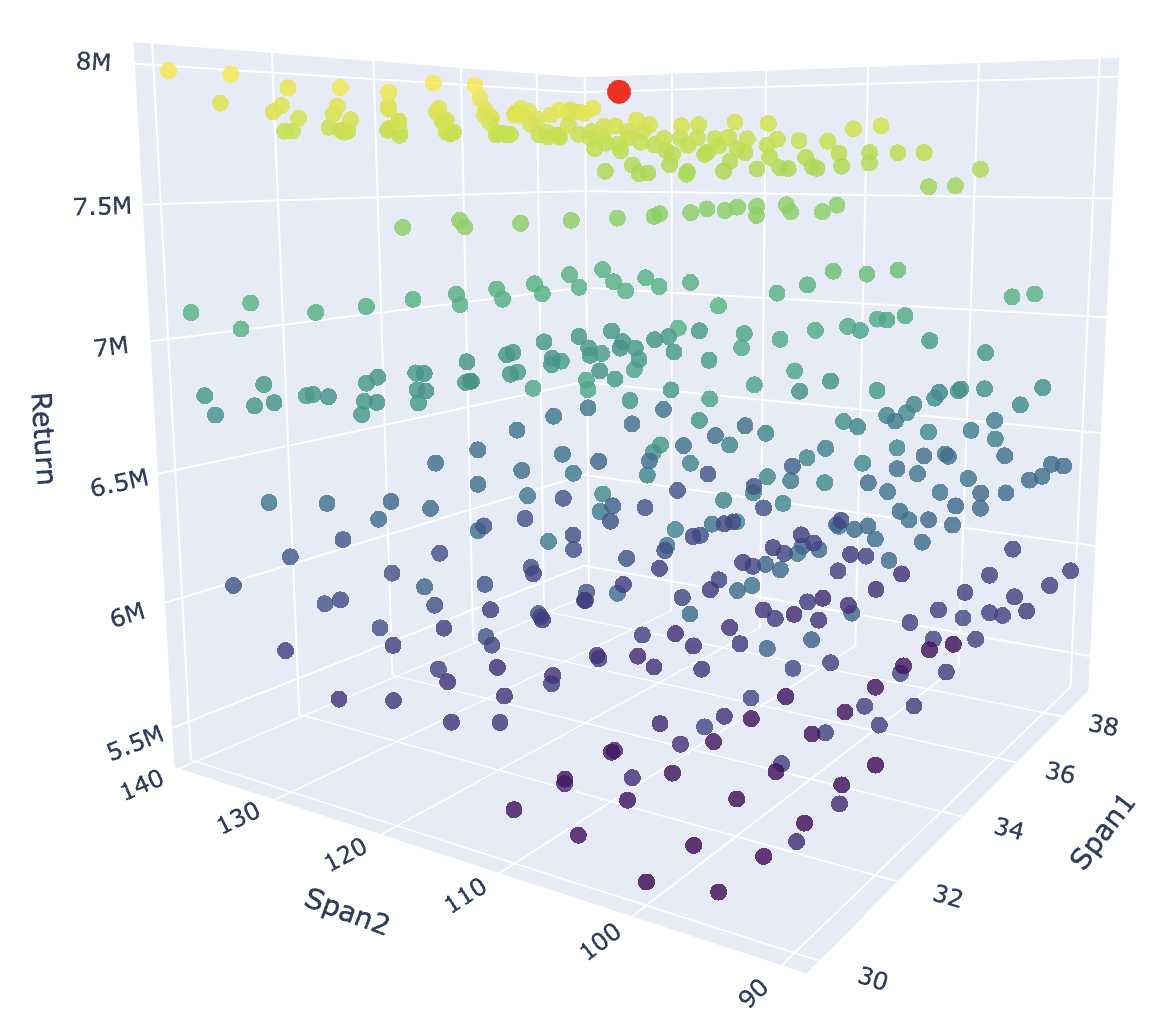

# 4. Results

On a further backtest, we can see that growing the sizes of the span windows only increases the total revenues. However, the greater the windows, the harder it is to predict suddent changes. Thus, we can stop here, and the parameters of our best model are:

In [29]:
print(best_return, best_span1, best_span2)

7994917.081080036 39 135
